In [98]:
import pandas as pd
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer

In [99]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

### Stop words removal and wordnet lemmatizer

In [100]:
stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [101]:
def _clean_text(sentence):
    """
    method to clean text
    """
    # lower case
    sentence = sentence.lower()

    # remove special characters
    sentence = "".join([i for i in sentence if i not in string.punctuation])

    tokens = sentence.split()

    # stop word removal
    clean_text = [i for i in tokens if i not in stopwords]

    # lemma form
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in clean_text])
    return lemm_text

### Clean both input and output text

In [102]:
df_train['new_input'] = df_train['input'].apply(lambda x: _clean_text(x))
df_test['new_input'] = df_test['input'].apply(lambda x: _clean_text(x))

### Train and Test Data

In [103]:
X_train = df_train['input']
y_train = df_train['label']

X_test = df_test['input']
y_test = df_test['label']

### Pipeline for Tfidf vectorizer and SVM model

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [105]:
clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [106]:
clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [107]:
predictions = text_clf_lsvc.predict(X_test)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       581
           1       0.89      0.94      0.92       695
           2       0.82      0.72      0.77       159
           3       0.89      0.87      0.88       275
           4       0.89      0.82      0.85       224
           5       0.74      0.65      0.69        66

    accuracy                           0.89      2000
   macro avg       0.86      0.82      0.84      2000
weighted avg       0.89      0.89      0.89      2000



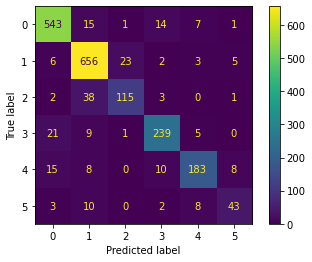

In [110]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()